In [2]:
!pip install detecto
!pip install gdown

In [3]:
import gdown
url = 'https://drive.google.com/uc?id=1T43LOt6qghLfLr_M3C8otF-SxOEE-J2l'
output = 'data.zip'
gdown.download(url, output, quiet=False)

!unzip data.zip

Downloading...
From: https://drive.google.com/uc?id=1T43LOt6qghLfLr_M3C8otF-SxOEE-J2l
To: /content/data.zip
155MB [00:01, 78.4MB/s]


Archive:  data.zip
   creating: Bird/JPEGImages/test/
   creating: Bird/Annotations/test/
  inflating: Bird/Annotations/eval/Bird (9).xml  
  inflating: Bird/Annotations/train/Bird (6).xml  
  inflating: Bird/Annotations/eval/Bird (12).xml  
  inflating: Bird/Annotations/eval/Bird (2).xml  
  inflating: Bird/Annotations/train/Bird (16).xml  
  inflating: Bird/Annotations/train/Bird (13).xml  
  inflating: Bird/Annotations/train/Bird (15).xml  
  inflating: Bird/Annotations/train/Bird (8).xml  
  inflating: Bird/Annotations/train/Bird (10).xml  
  inflating: Bird/Annotations/train/Bird (1).xml  
  inflating: Bird/Annotations/train/Bird (4).xml  
  inflating: Bird/Annotations/train/Bird (11).xml  
  inflating: Bird/Annotations/train/Bird (14).xml  
  inflating: Bird/Annotations/train/Bird (3).xml  
  inflating: Bird/JPEGImages/train/Bird (14).jpg  
  inflating: Bird/JPEGImages/train/Bird (3).jpg  
  inflating: Bird/JPEGImages/train/Bird (15).jpg  
  inflating: Bird/Annotations/train/Bird

In [ ]:
import os
import torch
from torchvision import transforms, utils
from detecto.core import Model, Dataset,DataLoader
from detecto import utils, visualize
from detecto.utils import default_transforms
from detecto import core


  

In [ ]:
training_label_folder = '/content/Bird/Annotations/train' #XML --> Pascal voc
training_image_folder = '/content/Bird/JPEGImages/train'



In [ ]:
testing_label_folder = '/content/Bird/Annotations/eval'
testing_image_folder = '/content/Bird/JPEGImages/eval'

In [ ]:
# params_transforms = transforms.Compose([transforms.ToTensor(),
#                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                                             std=[0.229, 0.224, 0.225]),
#                                         transforms.Resize(256)
#                                         ])

# training_dataset = Dataset(x, transform=params_transforms)
# testing_dataset = Dataset(x,transform=params_transforms)

# print(training_dataset)


###############################################

# Convert XML files to CSV format
utils.xml_to_csv(training_label_folder, 'train_labels.csv')
utils.xml_to_csv(testing_label_folder , 'val_labels.csv')


params_transforms = transforms.Compose([transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                            std=[0.229, 0.224, 0.225]),
                                        transforms.Resize(256)
                                        ])

training_dataset = Dataset('train_labels.csv' ,training_image_folder, transform=params_transforms)

# testing_label_folder = training_label_folder
# testing_image_folder = '/content/drive/MyDrive/Super AI Engineer/Img_obj_dectection/Card/train_raw/IMG'
# Images and XML files in separate folders
testing_dataset = Dataset('val_labels.csv' ,testing_image_folder, transform=params_transforms)


print(training_dataset)


In [ ]:
# import pandas as pd
# df = pd.read_csv("/content/train_labels.csv")
# df

In [ ]:
labels = ["Bird"]
model = Model(labels)
# if not os.path.exists('model_weights.pth'):
#     model = Model(labels,
#                   #  device=torch.device('cpu')
#                 )
# else:
#     model = Model.load('model_weights.pth', labels)


loader = DataLoader(training_dataset, batch_size=2, shuffle=True)
losses = model.fit(loader,testing_dataset, epochs=1000, learning_rate=0.001,
                   gamma=0.2, lr_step_size=50, verbose=True)

# loader = core.DataLoader(training_dataset, batch_size=2, shuffle=True)

# model = core.Model(["name","telephone","company"])
# losses = model.fit(loader, testing_dataset, epochs=15,
#                    learning_rate=0.001, verbose=True)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch 1 of 1000
Begin iterating over training dataset


  0%|          | 0/3 [00:00<?, ?it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.2767470081647237
Epoch 2 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.22202604512373605
Epoch 3 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.62it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.49it/s]

Loss: 0.19435989360014597
Epoch 4 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.20418175061543783
Epoch 5 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.2007052352031072
Epoch 6 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.19247745474179587
Epoch 7 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.18213707705338797
Epoch 8 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.44it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1725455423196157
Epoch 9 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.92it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.17361688613891602
Epoch 10 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.98it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.18228697031736374
Epoch 11 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.82it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.17426676551500955
Epoch 12 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.42it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.2243817001581192
Epoch 13 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14067193617423376
Epoch 14 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.96it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15830348432064056
Epoch 15 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15665540099143982
Epoch 16 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.85it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14501739541689554
Epoch 17 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.160831888516744
Epoch 18 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.95it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.09it/s]

Loss: 0.16270243128140768
Epoch 19 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.38it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.15it/s]

Loss: 0.1497312436501185
Epoch 20 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.66it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15915906925996146
Epoch 21 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.12it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14483083287874857
Epoch 22 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1467360978325208
Epoch 23 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.64it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14814661194880804
Epoch 24 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.19it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15034668644269308
Epoch 25 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1512413869301478
Epoch 26 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.01it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.18163530280192694
Epoch 27 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.17091042548418045
Epoch 28 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.07it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1551548664768537
Epoch 29 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.13it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15103215724229813
Epoch 30 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.15it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.16904181987047195
Epoch 31 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1721869856119156
Epoch 32 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.23it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.16455179452896118
Epoch 33 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.19it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.30it/s]

Loss: 0.15114127844572067
Epoch 34 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.88it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.16555282225211462
Epoch 35 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.17411338289578757
Epoch 36 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.82it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15422222018241882
Epoch 37 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.07it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14861892660458884
Epoch 38 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.15it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.17288089295228323
Epoch 39 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.95it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.36it/s]

Loss: 0.1680507188042005
Epoch 40 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.87it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.17085114121437073
Epoch 41 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.65it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14588494102160135
Epoch 42 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.88it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15050572653611502
Epoch 43 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15015034874280295
Epoch 44 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1447895740469297
Epoch 45 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.49it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1479465737938881
Epoch 46 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.15it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.17472804834445319
Epoch 47 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13287568092346191
Epoch 48 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.61it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14279823998610178
Epoch 49 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.82it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14614262183507284
Epoch 50 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.45it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1441656400760015
Epoch 51 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.04it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14326402048269907
Epoch 52 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13915309309959412
Epoch 53 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.16it/s]

Loss: 0.13425919165213904
Epoch 54 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1445983424782753
Epoch 55 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.98it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13843763371308646
Epoch 56 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.95it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14351583272218704
Epoch 57 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.21it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14439187198877335
Epoch 58 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.72it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.20it/s]

Loss: 0.147129495938619
Epoch 59 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.10it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1435842216014862
Epoch 60 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14747164895137152
Epoch 61 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.11it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.11it/s]

Loss: 0.14898211260636648
Epoch 62 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13861209154129028
Epoch 63 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.82it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14075738191604614
Epoch 64 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14049588640530905
Epoch 65 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1513629655043284
Epoch 66 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.07it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1445178190867106
Epoch 67 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.27it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14749009907245636
Epoch 68 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15536093215147653
Epoch 69 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.96it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15153833478689194
Epoch 70 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.97it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15317788968483606
Epoch 71 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15835234274466833
Epoch 72 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15904988845189413
Epoch 73 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14832045137882233
Epoch 74 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.82it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1557591532667478
Epoch 75 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.84it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1478321353594462
Epoch 76 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.151725006600221
Epoch 77 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.39it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15267241994539896
Epoch 78 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.15it/s]

Loss: 0.14547210683425268
Epoch 79 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14304587741692862
Epoch 80 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.23it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15152286241451898
Epoch 81 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14896710713704428
Epoch 82 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.00it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14586956799030304
Epoch 83 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.79it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14423401653766632
Epoch 84 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1481796478231748
Epoch 85 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.75it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14441456149021784
Epoch 86 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14580058058102927
Epoch 87 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.05it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14712957044442496
Epoch 88 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14634529004494348
Epoch 89 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.83it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.15018529444932938
Epoch 90 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.06it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1416027471423149
Epoch 91 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1408674195408821
Epoch 92 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.07it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13696794708569845
Epoch 93 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.06it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1447715957959493
Epoch 94 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.01it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14571993549664816
Epoch 95 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1439412459731102
Epoch 96 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.65it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.24it/s]

Loss: 0.1482764631509781
Epoch 97 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14716865122318268
Epoch 98 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.70it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14228608955939612
Epoch 99 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14463197688261667
Epoch 100 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.66it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1433406745394071
Epoch 101 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.44it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1424370432893435
Epoch 102 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.23it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14330006639162698
Epoch 103 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.96it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13900677859783173
Epoch 104 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.66it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14298993845780691
Epoch 105 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.07it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1478785127401352
Epoch 106 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.25it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13817406445741653
Epoch 107 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.32it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13942511131366095
Epoch 108 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.42it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13938570022583008
Epoch 109 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.16it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1384375592072805
Epoch 110 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13860912124315897
Epoch 111 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.22it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13977948824564615
Epoch 112 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.94it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14045703411102295
Epoch 113 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13928011059761047
Epoch 114 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13803508381048837
Epoch 115 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13813959807157516
Epoch 116 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.47it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13940841952959696
Epoch 117 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.13it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13871113459269205
Epoch 118 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1417690540353457
Epoch 119 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13980508844057718
Epoch 120 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.91it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1406327486038208
Epoch 121 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.61it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14007151375214258
Epoch 122 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.14it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13835898290077844
Epoch 123 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.12it/s]

Loss: 0.14887595921754837
Epoch 124 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.14it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1338507483402888
Epoch 125 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13343034436305365
Epoch 126 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.12it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.21it/s]

Loss: 0.13253981123367944
Epoch 127 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.78it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13288111984729767
Epoch 128 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.21it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14207305759191513
Epoch 129 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.85it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1406849871079127
Epoch 130 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1431236763795217
Epoch 131 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.61it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14094694207111994
Epoch 132 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.37it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.24it/s]

Loss: 0.14141960938771567
Epoch 133 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.16it/s]

Loss: 0.13968589653571448
Epoch 134 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14068772395451865
Epoch 135 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.15it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14164549112319946
Epoch 136 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.74it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14150122801462808
Epoch 137 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14247761170069376
Epoch 138 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.74it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13984507073958716
Epoch 139 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.27it/s]

Loss: 0.1405030166109403
Epoch 140 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.80it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14223945885896683
Epoch 141 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.44it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.16it/s]

Loss: 0.1405558561285337
Epoch 142 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.62it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14252306272586188
Epoch 143 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.84it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14046774804592133
Epoch 144 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13403162360191345
Epoch 145 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14267568041880926
Epoch 146 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.44it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13725623240073523
Epoch 147 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.78it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.11it/s]

Loss: 0.14163532853126526
Epoch 148 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.89it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.32it/s]

Loss: 0.13974624375502268
Epoch 149 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1387353092432022
Epoch 150 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1387848307689031
Epoch 151 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.64it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.30it/s]

Loss: 0.14030261089404425
Epoch 152 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1380408008893331
Epoch 153 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13661196579535803
Epoch 154 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13725094497203827
Epoch 155 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.70it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.17it/s]

Loss: 0.13699505726496378
Epoch 156 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.42it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13654360175132751
Epoch 157 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.36it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13593375434478125
Epoch 158 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.79it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.26it/s]

Loss: 0.13632779816786447
Epoch 159 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13887013991673788
Epoch 160 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.16it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13537956029176712
Epoch 161 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.49it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1352100595831871
Epoch 162 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13771500438451767
Epoch 163 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.66it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13595141967137656
Epoch 164 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.64it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13545604795217514
Epoch 165 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13503552973270416
Epoch 166 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13555649171272913
Epoch 167 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.09it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1366716573635737
Epoch 168 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.96it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13626710573832193
Epoch 169 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13532941540082297
Epoch 170 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13652255882819495
Epoch 171 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13570064306259155
Epoch 172 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.10it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13904786854982376
Epoch 173 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13926306863625845
Epoch 174 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13989238937695822
Epoch 175 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.70it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14070984224478403
Epoch 176 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.48it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14128258327643076
Epoch 177 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.97it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1402682214975357
Epoch 178 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14019657671451569
Epoch 179 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.10it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1437278538942337
Epoch 180 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14085033535957336
Epoch 181 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.89it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1392961045106252
Epoch 182 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13939152409633002
Epoch 183 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.14it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14258878181378046
Epoch 184 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.47it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.28it/s]

Loss: 0.14135364691416422
Epoch 185 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.75it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14030667394399643
Epoch 186 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14155611395835876
Epoch 187 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.76it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1433867191274961
Epoch 188 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.99it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.29it/s]

Loss: 0.13955764720837274
Epoch 189 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.11it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13927317907412848
Epoch 190 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14045472691456476
Epoch 191 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.38it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13843229164679846
Epoch 192 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.93it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14010665317376456
Epoch 193 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13992845763762793
Epoch 194 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.59it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.13it/s]

Loss: 0.1386049489180247
Epoch 195 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.16it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1408794348438581
Epoch 196 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.19it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.19it/s]

Loss: 0.14189856996138892
Epoch 197 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.03it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.16it/s]

Loss: 0.13901610672473907
Epoch 198 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.62it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1418199986219406
Epoch 199 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.76it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14029978960752487
Epoch 200 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.97it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1394020269314448
Epoch 201 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.22it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14093723644812903
Epoch 202 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.09it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14069494356711706
Epoch 203 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13841069489717484
Epoch 204 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.24it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13933529456456503
Epoch 205 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.19it/s]

Loss: 0.14066232244173685
Epoch 206 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14007557183504105
Epoch 207 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.95it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13901987920204797
Epoch 208 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.10it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13999808579683304
Epoch 209 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13984512289365134
Epoch 210 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1398089403907458
Epoch 211 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.17it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14215468615293503
Epoch 212 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1404875765244166
Epoch 213 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.92it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14021828522284827
Epoch 214 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.68it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1384869838754336
Epoch 215 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.47it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.28it/s]

Loss: 0.13820813844601312
Epoch 216 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.67it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.28it/s]

Loss: 0.1432605634133021
Epoch 217 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.139284019668897
Epoch 218 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.20it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13881667206684747
Epoch 219 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.09it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14122970153888068
Epoch 220 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.66it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13933531194925308
Epoch 221 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.91it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14039210975170135
Epoch 222 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.32it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13791777193546295
Epoch 223 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.29it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14052742719650269
Epoch 224 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.19it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1395997405052185
Epoch 225 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.94it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.22it/s]

Loss: 0.13909351577361426
Epoch 226 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.49it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13779307901859283
Epoch 227 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.85it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14074726651112238
Epoch 228 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.92it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13799730191628137
Epoch 229 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.07it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.14it/s]

Loss: 0.1366256574789683
Epoch 230 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14105388025442758
Epoch 231 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13930639624595642
Epoch 232 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.23it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1366147150595983
Epoch 233 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.17it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13572319348653158
Epoch 234 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.80it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1388094648718834
Epoch 235 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.42it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13540193686882654
Epoch 236 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.85it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13715005417664847
Epoch 237 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.06it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13942451030015945
Epoch 238 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.92it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1382806102434794
Epoch 239 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.01it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1370028555393219
Epoch 240 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.68it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13779745995998383
Epoch 241 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.10it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13745575646559396
Epoch 242 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.68it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1373191699385643
Epoch 243 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.47it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.30it/s]

Loss: 0.1370266949137052
Epoch 244 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.68it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13887077818314233
Epoch 245 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.11it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13572426388661066
Epoch 246 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13571786880493164
Epoch 247 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.48it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13675724963347116
Epoch 248 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13788543144861856
Epoch 249 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.65it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13776019463936487
Epoch 250 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.70it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.07it/s]

Loss: 0.13395966589450836
Epoch 251 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.61it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13714072356621423
Epoch 252 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.11it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1367699628074964
Epoch 253 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13452491909265518
Epoch 254 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1360875442624092
Epoch 255 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.20it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13769017656644186
Epoch 256 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.75it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13457785298426947
Epoch 257 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.86it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1336158812046051
Epoch 258 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.44it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13671850164731345
Epoch 259 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.07it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13375451415777206
Epoch 260 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1349791387716929
Epoch 261 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1360569174091021
Epoch 262 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.47it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14224842190742493
Epoch 263 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13558927923440933
Epoch 264 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13410725692907968
Epoch 265 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.03it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13584239780902863
Epoch 266 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.98it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13496575256188711
Epoch 267 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.95it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1374856928984324
Epoch 268 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13553708791732788
Epoch 269 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.12it/s]

Loss: 0.13443919519583383
Epoch 270 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13925285637378693
Epoch 271 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13570365061362585
Epoch 272 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13550055772066116
Epoch 273 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13558679819107056
Epoch 274 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.71it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1346567968527476
Epoch 275 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.75it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13366324454545975
Epoch 276 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.17it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13426915804545084
Epoch 277 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.01it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.33it/s]

Loss: 0.13499242812395096
Epoch 278 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.96it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1384115864833196
Epoch 279 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.29it/s]

Loss: 0.1358023832241694
Epoch 280 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13526727259159088
Epoch 281 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.88it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.27it/s]

Loss: 0.136668232580026
Epoch 282 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.75it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13727091252803802
Epoch 283 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.32it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13711771368980408
Epoch 284 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.48it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.56it/s]

Loss: 0.13518405705690384
Epoch 285 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14041958252588907
Epoch 286 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.41it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13570263981819153
Epoch 287 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.33it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13745037714640299
Epoch 288 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.99it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13803462187449136
Epoch 289 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.10it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13430196543534598
Epoch 290 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1353902593255043
Epoch 291 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.99it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.61it/s]

Loss: 0.13728784769773483
Epoch 292 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.134293461839358
Epoch 293 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.45it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13511882225672403
Epoch 294 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.00it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1360004022717476
Epoch 295 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.98it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13845735291639963
Epoch 296 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.97it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13439784198999405
Epoch 297 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.17it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1364219437042872
Epoch 298 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.41it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1351315677165985
Epoch 299 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.49it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13559085130691528
Epoch 300 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.01it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13534713039795557
Epoch 301 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.02it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13632611433664957
Epoch 302 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13659613082806268
Epoch 303 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.11it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13508600989977518
Epoch 304 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.11it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1366403897603353
Epoch 305 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.66it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13637379060188928
Epoch 306 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13584307581186295
Epoch 307 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.71it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13746827592452368
Epoch 308 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.21it/s]

Loss: 0.1343239371975263
Epoch 309 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.04it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13635845482349396
Epoch 310 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13599511235952377
Epoch 311 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.75it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.30it/s]

Loss: 0.13554871082305908
Epoch 312 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13524354994297028
Epoch 313 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.40it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13526481638352075
Epoch 314 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13530979057153067
Epoch 315 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.20it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1354272315899531
Epoch 316 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.09it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13810855646928152
Epoch 317 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13515719026327133
Epoch 318 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.32it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13912279158830643
Epoch 319 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13593772302071253
Epoch 320 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.73it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.20it/s]

Loss: 0.1380858545502027
Epoch 321 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.02it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13453430185715357
Epoch 322 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.48it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13540753225485483
Epoch 323 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.22it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.15it/s]

Loss: 0.13413619746764502
Epoch 324 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.15it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13587926576534906
Epoch 325 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.88it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.138388492166996
Epoch 326 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.89it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13636787484089533
Epoch 327 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.90it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13669071098168692
Epoch 328 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.12it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13526570051908493
Epoch 329 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.48it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13492770741383234
Epoch 330 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.61it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.27it/s]

Loss: 0.1353356639544169
Epoch 331 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13760625819365183
Epoch 332 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.35it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1354848841826121
Epoch 333 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.61it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.41it/s]

Loss: 0.134696955482165
Epoch 334 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.07it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13550523668527603
Epoch 335 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1372470905383428
Epoch 336 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1352480153242747
Epoch 337 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13504022359848022
Epoch 338 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13595759371916452
Epoch 339 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13629139959812164
Epoch 340 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13456720362106958
Epoch 341 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.20it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13545161734024683
Epoch 342 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1349410613377889
Epoch 343 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.49it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13439003129800162
Epoch 344 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13427973290284476
Epoch 345 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.06it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14315193394819895
Epoch 346 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.31it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13404699663321176
Epoch 347 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.84it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13513032098611197
Epoch 348 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.65it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13661537816127142
Epoch 349 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1354032208522161
Epoch 350 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.61it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13481653978427252
Epoch 351 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.64it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13692170133193335
Epoch 352 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.05it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1374265750249227
Epoch 353 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.66it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.23it/s]

Loss: 0.13569483160972595
Epoch 354 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13655421137809753
Epoch 355 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.19it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.36it/s]

Loss: 0.1356226826707522
Epoch 356 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13536130140225092
Epoch 357 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13492618997891745
Epoch 358 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.20it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.20it/s]

Loss: 0.13612051556507745
Epoch 359 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.97it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13497559974590936
Epoch 360 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.78it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13544739286104837
Epoch 361 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13568809380133948
Epoch 362 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.05it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1362231249610583
Epoch 363 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.74it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1443369189898173
Epoch 364 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.64it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13463027030229568
Epoch 365 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.13it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1405193731188774
Epoch 366 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1374296396970749
Epoch 367 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.86it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13806508481502533
Epoch 368 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.19it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13469266146421432
Epoch 369 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.49it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.43it/s]

Loss: 0.13575764248768488
Epoch 370 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.13it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13740993787844977
Epoch 371 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1360688035686811
Epoch 372 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.16it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13565110663572946
Epoch 373 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.67it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13718844205141068
Epoch 374 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.41it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13688320418198904
Epoch 375 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.65it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1368205746014913
Epoch 376 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.07it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1355823576450348
Epoch 377 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.44it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1335290645559629
Epoch 378 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1353068103392919
Epoch 379 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1365165909131368
Epoch 380 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.19it/s]

Loss: 0.13780459761619568
Epoch 381 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.71it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13575428227583566
Epoch 382 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.11it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13694954166809717
Epoch 383 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.30it/s]

Loss: 0.13551583141088486
Epoch 384 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.35it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.27it/s]

Loss: 0.13521020114421844
Epoch 385 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.61it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13511653244495392
Epoch 386 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.25it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13509551684061685
Epoch 387 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.22it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1340257152915001
Epoch 388 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13709819068511328
Epoch 389 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.88it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1435802380243937
Epoch 390 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1339279760917028
Epoch 391 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.91it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1348789483308792
Epoch 392 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.02it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13431798915068308
Epoch 393 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.79it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13561197618643442
Epoch 394 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.15it/s]

Loss: 0.13436505943536758
Epoch 395 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.22it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1352169265349706
Epoch 396 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.11it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1353948712348938
Epoch 397 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.14it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13653821249802908
Epoch 398 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13530292610327402
Epoch 399 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.21it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13583271702130637
Epoch 400 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.36it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13537443180878958
Epoch 401 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13623003661632538
Epoch 402 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.70it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.24it/s]

Loss: 0.13497135043144226
Epoch 403 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.70it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13450252264738083
Epoch 404 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13921606540679932
Epoch 405 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13616436968247095
Epoch 406 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.65it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13483472416798273
Epoch 407 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.48it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1354020337263743
Epoch 408 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13523203631242117
Epoch 409 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13487159460783005
Epoch 410 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.92it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1351905589302381
Epoch 411 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13697084039449692
Epoch 412 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14375214527050653
Epoch 413 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.68it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13745231678088507
Epoch 414 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13696896781524023
Epoch 415 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13573371867338815
Epoch 416 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.71it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1344927375515302
Epoch 417 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1359053154786428
Epoch 418 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.20it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.17it/s]

Loss: 0.13640661785999933
Epoch 419 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.45it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13656060894330344
Epoch 420 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1360617602864901
Epoch 421 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.74it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13706299165884653
Epoch 422 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13513119022051492
Epoch 423 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1379197637240092
Epoch 424 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.84it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1369206408659617
Epoch 425 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1343685487906138
Epoch 426 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.02it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13628609975179037
Epoch 427 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1361233020822207
Epoch 428 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.70it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13393856088320413
Epoch 429 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.97it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.57it/s]

Loss: 0.13485235224167505
Epoch 430 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1366649568080902
Epoch 431 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.48it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1465777282913526
Epoch 432 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.29it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.17it/s]

Loss: 0.13661082834005356
Epoch 433 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.22it/s]

Loss: 0.13611441105604172
Epoch 434 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13493482520182928
Epoch 435 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13380023837089539
Epoch 436 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1384319613377253
Epoch 437 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1350259706377983
Epoch 438 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13511358946561813
Epoch 439 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.134374238550663
Epoch 440 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.88it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1342757691939672
Epoch 441 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1357171709338824
Epoch 442 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13599228610595068
Epoch 443 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.09it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13536139577627182
Epoch 444 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.42it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13698704540729523
Epoch 445 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.88it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1368069996436437
Epoch 446 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.47it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13416805615027746
Epoch 447 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.40it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13541124761104584
Epoch 448 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13631676882505417
Epoch 449 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.89it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13720997671286264
Epoch 450 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13680647065242132
Epoch 451 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13492480913798013
Epoch 452 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.44it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13542566945155463
Epoch 453 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13343320290247598
Epoch 454 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.05it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13571309049924216
Epoch 455 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.47it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13545861343542734
Epoch 456 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.01it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1342730795343717
Epoch 457 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.98it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1334900309642156
Epoch 458 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.80it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13511777172485986
Epoch 459 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.44it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13573603332042694
Epoch 460 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13637331376473108
Epoch 461 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13625357300043106
Epoch 462 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13632268955310187
Epoch 463 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13598656902710596
Epoch 464 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.65it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13405382136503854
Epoch 465 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.19it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1359736348191897
Epoch 466 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.46it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1359078735113144
Epoch 467 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13579098880290985
Epoch 468 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.11it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1392574111620585
Epoch 469 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.04it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13760719945033392
Epoch 470 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.24it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13806171715259552
Epoch 471 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.93it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.137487123409907
Epoch 472 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13587655623753866
Epoch 473 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.44it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1344897225499153
Epoch 474 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.01it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13533194114764532
Epoch 475 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13626318921645483
Epoch 476 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13575263569752374
Epoch 477 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14061169077952704
Epoch 478 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13459860781828561
Epoch 479 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.93it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13635209699471793
Epoch 480 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.77it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13492881258328757
Epoch 481 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.01it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13534590353568396
Epoch 482 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.91it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13566445310910544
Epoch 483 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13602889577547708
Epoch 484 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.90it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13469740996758142
Epoch 485 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13777975489695868
Epoch 486 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.35it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13592003285884857
Epoch 487 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13622099657853445
Epoch 488 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.12it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1350181301434835
Epoch 489 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13613905757665634
Epoch 490 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1363688955704371
Epoch 491 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.94it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13419393946727118
Epoch 492 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.15it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1349372093876203
Epoch 493 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13338283946116766
Epoch 494 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.137396772702535
Epoch 495 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.22it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13684247682491937
Epoch 496 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13671178867419562
Epoch 497 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.12it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1346535931030909
Epoch 498 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.45it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13515210896730423
Epoch 499 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.88it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1363509843746821
Epoch 500 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.30it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13492000102996826
Epoch 501 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.14it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1356519808371862
Epoch 502 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.94it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13555804391702017
Epoch 503 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13403581082820892
Epoch 504 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.74it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1342661256591479
Epoch 505 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.91it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13542360564072928
Epoch 506 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.27it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13785688330729803
Epoch 507 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.22it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.09it/s]

Loss: 0.13373431811730066
Epoch 508 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.45it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1355194946130117
Epoch 509 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.48it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13509353001912436
Epoch 510 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.82it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13526924699544907
Epoch 511 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.03it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13456955552101135
Epoch 512 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.33it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.25it/s]

Loss: 0.1350177600979805
Epoch 513 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.06it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13498062640428543
Epoch 514 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.06it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13690824806690216
Epoch 515 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.49it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.26it/s]

Loss: 0.13521777590115866
Epoch 516 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.99it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13632778575023016
Epoch 517 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.49it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13562158246835074
Epoch 518 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1380459318558375
Epoch 519 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.11it/s]

Loss: 0.13712190836668015
Epoch 520 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.62it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1360237573583921
Epoch 521 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.98it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.21it/s]

Loss: 0.13757117092609406
Epoch 522 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.71it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13438419004281363
Epoch 523 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1361702581246694
Epoch 524 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13793535033861795
Epoch 525 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.89it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13367516299088797
Epoch 526 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.47it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13509079813957214
Epoch 527 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.82it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13561161855856577
Epoch 528 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.98it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1357476090391477
Epoch 529 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.23it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1345931018392245
Epoch 530 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.42it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13444378475348154
Epoch 531 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1337746779123942
Epoch 532 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.45it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13635524610678354
Epoch 533 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.01it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13613525529702505
Epoch 534 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.20it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13500638802846274
Epoch 535 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.37it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.134399284919103
Epoch 536 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13616236547629038
Epoch 537 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1349122275908788
Epoch 538 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.10it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13702123363812765
Epoch 539 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.38it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1347877730925878
Epoch 540 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13468065857887268
Epoch 541 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.48it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1365878830353419
Epoch 542 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.19it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1394746502240499
Epoch 543 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13730534662803015
Epoch 544 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.01it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13529578348000845
Epoch 545 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.01it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1361716240644455
Epoch 546 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.20it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.22it/s]

Loss: 0.13384628047545752
Epoch 547 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.61it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13411818941434225
Epoch 548 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.28it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13539936890204748
Epoch 549 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.91it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1386234611272812
Epoch 550 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.26it/s]

Loss: 0.13865780582030615
Epoch 551 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.62it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1384305531779925
Epoch 552 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13467537115017572
Epoch 553 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.74it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13526302327712378
Epoch 554 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13443839798370996
Epoch 555 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.92it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13556810468435287
Epoch 556 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.16it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1364710877339045
Epoch 557 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.89it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13850082705418268
Epoch 558 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.27it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13688533753156662
Epoch 559 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13735539962848028
Epoch 560 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.09it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13663162042697272
Epoch 561 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.74it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13376282155513763
Epoch 562 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1373907526334127
Epoch 563 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.91it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13896928230921426
Epoch 564 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14217091103394827
Epoch 565 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.35it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13504748046398163
Epoch 566 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.64it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13616846998532614
Epoch 567 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.65it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13559483488400778
Epoch 568 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13477239509423575
Epoch 569 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13552611569563547
Epoch 570 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13642290234565735
Epoch 571 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.49it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1356392800807953
Epoch 572 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.37it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13410642743110657
Epoch 573 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.33it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14352157711982727
Epoch 574 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1351901739835739
Epoch 575 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.48it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.24it/s]

Loss: 0.13670245806376138
Epoch 576 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.47it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13709275921185812
Epoch 577 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.14it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1351518084605535
Epoch 578 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.84it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13609694937864938
Epoch 579 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.27it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13567200303077698
Epoch 580 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.64it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13645087679227194
Epoch 581 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.12it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1384336700042089
Epoch 582 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.50it/s]

Loss: 0.13424549996852875
Epoch 583 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.17it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1359264055887858
Epoch 584 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.04it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13494995733102164
Epoch 585 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.86it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13540610671043396
Epoch 586 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.28it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13683544596036276
Epoch 587 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13560655216375986
Epoch 588 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13738600413004556
Epoch 589 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.22it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1347071627775828
Epoch 590 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.12it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.55it/s]

Loss: 0.13719868659973145
Epoch 591 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.86it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13442391157150269
Epoch 592 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13651053110758463
Epoch 593 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.81it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1361104150613149
Epoch 594 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1355323592821757
Epoch 595 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.75it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.10it/s]

Loss: 0.13555078705151877
Epoch 596 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13520645598570505
Epoch 597 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.64it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13389101127783457
Epoch 598 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.135296031832695
Epoch 599 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.77it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13534277180830637
Epoch 600 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.68it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13387260337670645
Epoch 601 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.83it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13719941675662994
Epoch 602 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1349622905254364
Epoch 603 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.99it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13676980137825012
Epoch 604 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.29it/s]

Loss: 0.13758949438730875
Epoch 605 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13686145345369974
Epoch 606 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.70it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13621850311756134
Epoch 607 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.28it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.14it/s]

Loss: 0.13556062678496042
Epoch 608 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.29it/s]

Loss: 0.1347859799861908
Epoch 609 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.62it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.24it/s]

Loss: 0.14014238119125366
Epoch 610 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13547552128632864
Epoch 611 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13490855197111765
Epoch 612 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1346834103266398
Epoch 613 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.05it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13526035845279694
Epoch 614 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.46it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13369267682234445
Epoch 615 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13520820438861847
Epoch 616 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13538157443205515
Epoch 617 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.21it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.29it/s]

Loss: 0.13570764660835266
Epoch 618 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13477939367294312
Epoch 619 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.15it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.21it/s]

Loss: 0.13589684665203094
Epoch 620 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.72it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.62it/s]

Loss: 0.1390614410241445
Epoch 621 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.73it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.20it/s]

Loss: 0.1340897927681605
Epoch 622 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.64it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13412385185559592
Epoch 623 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.80it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13527035216490427
Epoch 624 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.47it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.04it/s]

Loss: 0.13443058729171753
Epoch 625 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1359762450059255
Epoch 626 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.64it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13562852640946707
Epoch 627 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.76it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.14it/s]

Loss: 0.13592316706975302
Epoch 628 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13465855518976846
Epoch 629 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.05it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13482526938120523
Epoch 630 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.09it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13486490150292715
Epoch 631 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.23it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13836297889550528
Epoch 632 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.17it/s]

Loss: 0.13702252507209778
Epoch 633 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.84it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1353319138288498
Epoch 634 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1376083642244339
Epoch 635 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.11it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1357036978006363
Epoch 636 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.66it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13667082786560059
Epoch 637 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.06it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1357810546954473
Epoch 638 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.03it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13595408697923025
Epoch 639 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13757056991259256
Epoch 640 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.80it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13505988319714865
Epoch 641 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.70it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13571308056513467
Epoch 642 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.29it/s]

Loss: 0.13576794664065042
Epoch 643 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.64it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13737808664639792
Epoch 644 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13603830834229788
Epoch 645 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.93it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13571099440256754
Epoch 646 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.46it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13657518227895102
Epoch 647 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.77it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1340814232826233
Epoch 648 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13417788843313852
Epoch 649 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1355290561914444
Epoch 650 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13516947627067566
Epoch 651 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.45it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13488956292470297
Epoch 652 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.71it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13699435194333395
Epoch 653 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13580398758252463
Epoch 654 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.81it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13553354640801749
Epoch 655 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13548403481642404
Epoch 656 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.16it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13548184434572855
Epoch 657 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.06it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.29it/s]

Loss: 0.13415215909481049
Epoch 658 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.88it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.22it/s]

Loss: 0.1354922205209732
Epoch 659 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13681642214457193
Epoch 660 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.138246218363444
Epoch 661 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13623187442620596
Epoch 662 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.00it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1351016362508138
Epoch 663 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13463444511095682
Epoch 664 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.44it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13629173239072165
Epoch 665 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.23it/s]

Loss: 0.1366838663816452
Epoch 666 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13738932212193808
Epoch 667 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.74it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13510614136854807
Epoch 668 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.67it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1359733243783315
Epoch 669 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13547889391581217
Epoch 670 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.05it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.19it/s]

Loss: 0.13540783524513245
Epoch 671 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.69it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.25it/s]

Loss: 0.13363710045814514
Epoch 672 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13653188943862915
Epoch 673 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.96it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1350794037183126
Epoch 674 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13606237868467966
Epoch 675 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.16it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1371405671040217
Epoch 676 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.53it/s]

Loss: 0.13418984413146973
Epoch 677 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.61it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.18it/s]

Loss: 0.13627493878205618
Epoch 678 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.10it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13667040566603342
Epoch 679 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.16it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13585533698399863
Epoch 680 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13622119029362997
Epoch 681 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.15it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.19it/s]

Loss: 0.13637895385424295
Epoch 682 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.98it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13649386167526245
Epoch 683 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.97it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13695400953292847
Epoch 684 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1370142549276352
Epoch 685 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1345365047454834
Epoch 686 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1373293399810791
Epoch 687 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.73it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.19it/s]

Loss: 0.13667251666386923
Epoch 688 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.17it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13662839432557425
Epoch 689 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.62it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13471882541974387
Epoch 690 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.89it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.135271817445755
Epoch 691 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.61it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13559522231419882
Epoch 692 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.36it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13716493050257364
Epoch 693 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13550637165705362
Epoch 694 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1343806137641271
Epoch 695 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13595705231030783
Epoch 696 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13435719907283783
Epoch 697 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1346014440059662
Epoch 698 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.47it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13616180419921875
Epoch 699 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.17it/s]

Loss: 0.1349590321381887
Epoch 700 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13841931025187174
Epoch 701 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.85it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1359218806028366
Epoch 702 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.89it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1361307551463445
Epoch 703 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.15it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.20it/s]

Loss: 0.13621939222017923
Epoch 704 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.68it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13509699205557504
Epoch 705 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.36it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13574178020159403
Epoch 706 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.10it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13559971253077188
Epoch 707 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.00it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1353597790002823
Epoch 708 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.31it/s]

Loss: 0.1378049999475479
Epoch 709 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13458809753259024
Epoch 710 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1349860429763794
Epoch 711 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.93it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1354538549979528
Epoch 712 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.89it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1353859305381775
Epoch 713 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.67it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13626256585121155
Epoch 714 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13830741246541342
Epoch 715 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.95it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13360355297724405
Epoch 716 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13608388106028238
Epoch 717 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1369038075208664
Epoch 718 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.78it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.141703928510348
Epoch 719 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.10it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13521953423817953
Epoch 720 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.46it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1350814402103424
Epoch 721 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13466519117355347
Epoch 722 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13493027289708456
Epoch 723 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13473322987556458
Epoch 724 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.13it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13695747156937918
Epoch 725 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1367373764514923
Epoch 726 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14327427744865417
Epoch 727 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.62it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1357176254192988
Epoch 728 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.02it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13506517310937247
Epoch 729 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.02it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13716631134351095
Epoch 730 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.94it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1347851206858953
Epoch 731 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.93it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13453149795532227
Epoch 732 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13552034894625345
Epoch 733 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.95it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.137252410252889
Epoch 734 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13556923468907675
Epoch 735 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.17it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1346023033062617
Epoch 736 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1346718817949295
Epoch 737 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.21it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1391878922780355
Epoch 738 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.87it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13549335797627768
Epoch 739 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.41it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13478203117847443
Epoch 740 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.26it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13453752299149832
Epoch 741 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.27it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13675716519355774
Epoch 742 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.45it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1355082094669342
Epoch 743 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.88it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13526718815167746
Epoch 744 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.13it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13740518192450205
Epoch 745 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13498970369497934
Epoch 746 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.74it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13560828566551208
Epoch 747 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.99it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13743825256824493
Epoch 748 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.49it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13547246158123016
Epoch 749 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.34it/s]

Loss: 0.13587514062722525
Epoch 750 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.94it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.57it/s]

Loss: 0.1362405071655909
Epoch 751 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13587573170661926
Epoch 752 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1364391694466273
Epoch 753 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13522612551848093
Epoch 754 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.66it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1347143898407618
Epoch 755 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.62it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1356213092803955
Epoch 756 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.70it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13703911503156027
Epoch 757 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.14it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13485381503899893
Epoch 758 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.09it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1351990153392156
Epoch 759 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.38it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13400278488794962
Epoch 760 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.40it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.14it/s]

Loss: 0.13437899947166443
Epoch 761 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1359246422847112
Epoch 762 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13447813193003336
Epoch 763 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.46it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13531909386316934
Epoch 764 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13489020864168802
Epoch 765 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.34it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13559366762638092
Epoch 766 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.12it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13572330276171365
Epoch 767 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.97it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1345189462105433
Epoch 768 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13629324237505594
Epoch 769 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.66it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13752344250679016
Epoch 770 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.89it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13708699742952982
Epoch 771 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13627439240614572
Epoch 772 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.136055717865626
Epoch 773 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.46it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13731262584527335
Epoch 774 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13632847368717194
Epoch 775 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.83it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1342784414688746
Epoch 776 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.41it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1360384076833725
Epoch 777 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.95it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1359253078699112
Epoch 778 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13576223949591318
Epoch 779 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.44it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13567722340424856
Epoch 780 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13567094008127847
Epoch 781 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.47it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13687357803185782
Epoch 782 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.98it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13498535255591074
Epoch 783 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13476931055386862
Epoch 784 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.38it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13577033579349518
Epoch 785 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13485350211461386
Epoch 786 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.135572279493014
Epoch 787 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13575681547323862
Epoch 788 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.67it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1351162294546763
Epoch 789 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.97it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13414979974428812
Epoch 790 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.46it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13629580040772757
Epoch 791 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.12it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13583464423815408
Epoch 792 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.41it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13583133618036905
Epoch 793 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.02it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13478072981039682
Epoch 794 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.01it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13546944657961527
Epoch 795 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.47it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13477796812852225
Epoch 796 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.97it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13433804611365
Epoch 797 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.82it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13394398987293243
Epoch 798 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1345868706703186
Epoch 799 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13544429341952005
Epoch 800 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.70it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13967761397361755
Epoch 801 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.20it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13450648883978525
Epoch 802 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.92it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13512150446573892
Epoch 803 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.40it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13636823495229086
Epoch 804 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.17it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13600618640581766
Epoch 805 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.86it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13361425201098123
Epoch 806 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.65it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1347175786892573
Epoch 807 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.89it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13519829511642456
Epoch 808 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.75it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1370395521322886
Epoch 809 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.16it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13633275032043457
Epoch 810 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.49it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13518479963143668
Epoch 811 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13665511210759482
Epoch 812 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1363146354754766
Epoch 813 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.75it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.07it/s]

Loss: 0.13556722303231558
Epoch 814 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13633598883946738
Epoch 815 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.25it/s]

Loss: 0.13696552316347757
Epoch 816 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13504784802595773
Epoch 817 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.44it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1339219311873118
Epoch 818 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.71it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1370888501405716
Epoch 819 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.01it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13695756594340006
Epoch 820 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.32it/s]

Loss: 0.13839601973692575
Epoch 821 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.13it/s]

Loss: 0.1356439640124639
Epoch 822 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13663433492183685
Epoch 823 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.40it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1373004068930944
Epoch 824 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13802806039651236
Epoch 825 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.49it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13617844879627228
Epoch 826 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.46it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13381006320317587
Epoch 827 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.87it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13713560501734415
Epoch 828 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13580435514450073
Epoch 829 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13679204881191254
Epoch 830 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.41it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.45it/s]

Loss: 0.13422362009684244
Epoch 831 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.26it/s]

Loss: 0.13490334649880728
Epoch 832 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.16it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1381472945213318
Epoch 833 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.15it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13406550884246826
Epoch 834 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.45it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.23it/s]

Loss: 0.13571447134017944
Epoch 835 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13646692037582397
Epoch 836 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.07it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13557409743467966
Epoch 837 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13715952138106027
Epoch 838 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.78it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1365546981493632
Epoch 839 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.69it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1382939169804255
Epoch 840 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.36it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13793130218982697
Epoch 841 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.74it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1350459655125936
Epoch 842 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13529220720132193
Epoch 843 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.94it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13628165423870087
Epoch 844 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13649478554725647
Epoch 845 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.10it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13871664305528006
Epoch 846 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13662898540496826
Epoch 847 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1339428871870041
Epoch 848 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.71it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13587301472822824
Epoch 849 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.61it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13484973708788553
Epoch 850 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13468316197395325
Epoch 851 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.07it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13376041253407797
Epoch 852 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.12it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.18it/s]

Loss: 0.1357765644788742
Epoch 853 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13824906945228577
Epoch 854 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1358840415875117
Epoch 855 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.84it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1343206912279129
Epoch 856 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13427028059959412
Epoch 857 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.19it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13680578271547952
Epoch 858 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.30it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13422033687432608
Epoch 859 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.06it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13487698634465536
Epoch 860 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.48it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1351069857676824
Epoch 861 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.67it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1370447874069214
Epoch 862 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.93it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1364888846874237
Epoch 863 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.46it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.12it/s]

Loss: 0.13655701279640198
Epoch 864 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13561931749184927
Epoch 865 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.135685995221138
Epoch 866 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.42it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13534838457902273
Epoch 867 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.47it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13673418760299683
Epoch 868 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13466094434261322
Epoch 869 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.85it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.22it/s]

Loss: 0.13625835875670114
Epoch 870 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.74it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13531684378782907
Epoch 871 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13544800877571106
Epoch 872 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.61it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1336847891410192
Epoch 873 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.87it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1349548896153768
Epoch 874 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.29it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13529885311921439
Epoch 875 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.09it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.30it/s]

Loss: 0.13431811332702637
Epoch 876 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13761315743128458
Epoch 877 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.68it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1354412833849589
Epoch 878 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13557453950246176
Epoch 879 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1365582992633184
Epoch 880 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.57it/s]

Loss: 0.135562593738238
Epoch 881 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13486733535925546
Epoch 882 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.02it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13649985194206238
Epoch 883 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.15it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13703077038129172
Epoch 884 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1373477280139923
Epoch 885 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.21it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1365707367658615
Epoch 886 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.76it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1368451863527298
Epoch 887 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13459958136081696
Epoch 888 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.40it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1360556681950887
Epoch 889 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.81it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13655783732732138
Epoch 890 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1342650055885315
Epoch 891 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.13it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13575202226638794
Epoch 892 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13586434721946716
Epoch 893 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.13it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13540294269720712
Epoch 894 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.19it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13523461918036142
Epoch 895 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.77it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1348145604133606
Epoch 896 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.12it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.12it/s]

Loss: 0.1397401144107183
Epoch 897 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.68it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1356353908777237
Epoch 898 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.88it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13703285654385886
Epoch 899 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.42it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13730314373970032
Epoch 900 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.80it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13625365495681763
Epoch 901 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1365441381931305
Epoch 902 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.51it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13483402132987976
Epoch 903 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.62it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13649810353914896
Epoch 904 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13449309766292572
Epoch 905 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.25it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1344518562157949
Epoch 906 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13597221175829569
Epoch 907 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.03it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.22it/s]

Loss: 0.13589813311894736
Epoch 908 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.96it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13520419100920358
Epoch 909 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.72it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13362698256969452
Epoch 910 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.95it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14447206755479178
Epoch 911 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.62it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13463456432024637
Epoch 912 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.90it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1345348358154297
Epoch 913 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.54it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.27it/s]

Loss: 0.1348983496427536
Epoch 914 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1343267261981964
Epoch 915 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13397067288557687
Epoch 916 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.49it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.135287935535113
Epoch 917 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.28it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1357413629690806
Epoch 918 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.58it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1360529065132141
Epoch 919 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.19it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13589136799176535
Epoch 920 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.21it/s]

Loss: 0.1351213107506434
Epoch 921 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.76it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13540849586327872
Epoch 922 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.13it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.04it/s]

Loss: 0.13414660592873892
Epoch 923 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14160088201363882
Epoch 924 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13474324345588684
Epoch 925 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.65it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13758779565493265
Epoch 926 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.53it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13413879772027335
Epoch 927 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.90it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13692894577980042
Epoch 928 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13388967017332712
Epoch 929 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14105975131193796
Epoch 930 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.46it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1355701039234797
Epoch 931 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.41it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13563455641269684
Epoch 932 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13440771400928497
Epoch 933 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.79it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13530427714188895
Epoch 934 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  8.00it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13831132153669992
Epoch 935 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.94it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13619261980056763
Epoch 936 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.11it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13666555285453796
Epoch 937 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.91it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13725305596987405
Epoch 938 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13762343426545462
Epoch 939 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13664941986401877
Epoch 940 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.59it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1336255818605423
Epoch 941 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13517327109972635
Epoch 942 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13634898761908212
Epoch 943 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.93it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.15it/s]

Loss: 0.13758082687854767
Epoch 944 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13433603445688883
Epoch 945 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.44it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.18it/s]

Loss: 0.13728351394335428
Epoch 946 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.64it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13497035205364227
Epoch 947 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.88it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13620410362879434
Epoch 948 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.08it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13805483281612396
Epoch 949 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.03it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13856537640094757
Epoch 950 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.37it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13574934005737305
Epoch 951 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.23it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13392789661884308
Epoch 952 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.51it/s]

Loss: 0.1346286733945211
Epoch 953 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.47it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.29it/s]

Loss: 0.13455098370711008
Epoch 954 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.18it/s]

Loss: 0.13408554097016653
Epoch 955 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.40it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13586870829264322
Epoch 956 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1349867433309555
Epoch 957 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.48it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13738091786702475
Epoch 958 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.135957270860672
Epoch 959 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.98it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.14694614708423615
Epoch 960 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.13it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13468211392561594
Epoch 961 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.65it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13577197988828024
Epoch 962 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.13it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.36it/s]

Loss: 0.13579987486203512
Epoch 963 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.55it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13499788443247476
Epoch 964 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.81it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13614620765050253
Epoch 965 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13603854179382324
Epoch 966 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.05it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13633261124293009
Epoch 967 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1341001937786738
Epoch 968 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.91it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13590040306250253
Epoch 969 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.93it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13546394308408102
Epoch 970 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.24it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13536091645558676
Epoch 971 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.19it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1348024606704712
Epoch 972 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.93it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13625252743562064
Epoch 973 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.92it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13411174217859903
Epoch 974 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.17it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13549695909023285
Epoch 975 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.03it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13513506452242532
Epoch 976 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.50it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13566934565703073
Epoch 977 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.07it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13514520227909088
Epoch 978 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.23it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.50it/s]

Loss: 0.13570264478524527
Epoch 979 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.56it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13660123447577158
Epoch 980 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.52it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.17it/s]

Loss: 0.13483108083407083
Epoch 981 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.18it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13426833848158518
Epoch 982 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.134697953859965
Epoch 983 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.44it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.29it/s]

Loss: 0.13668950398763022
Epoch 984 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.93it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13567233085632324
Epoch 985 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.17it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13781330486138663
Epoch 986 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.91it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.34it/s]

Loss: 0.1385656843582789
Epoch 987 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.42it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13382037480672201
Epoch 988 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.63it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1355828046798706
Epoch 989 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.71it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13554856181144714
Epoch 990 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13562935590744019
Epoch 991 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.43it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13979635139306387
Epoch 992 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.57it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13576201101144156
Epoch 993 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.42it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13397786021232605
Epoch 994 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.48it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13677415251731873
Epoch 995 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.73it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.13716242214043936
Epoch 996 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.62it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1366583357254664
Epoch 997 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.60it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.25it/s]

Loss: 0.14119463165601095
Epoch 998 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


  0%|          | 0/7 [00:00<?, ?it/s]

Loss: 0.1378839115301768
Epoch 999 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  7.90it/s]

Begin iterating over validation dataset


 14%|█▍        | 1/7 [00:00<00:01,  5.16it/s]

Loss: 0.13568045695622763
Epoch 1000 of 1000
Begin iterating over training dataset


 33%|███▎      | 1/3 [00:00<00:00,  6.54it/s]

Begin iterating over validation dataset


100%|██████████| 3/3 [00:00<00:00,  8.74it/s]

Loss: 0.13537640372912088


In [ ]:
test_filename ='/content/drive/MyDrive/Super AI Engineer/Img_obj_dectection/Bird/JPEGImages/eval/Bird (9).jpg'
image = utils.read_image(test_filename)  # Helper function to read in images
image = params_transforms(image)

labels, boxes, scores = model.predict(image)  # Get all predictions on an image
# predictions = model.predict_top(image)  # Same as above, but returns only the top predictions

# print(labels, boxes, scores)
# print(predictions)

In [ ]:
scores

tensor([0.9953, 0.3352])

In [ ]:
boxes

tensor([[ 18.3046,  42.1683, 205.0477, 231.0222],
        [119.5136,  59.6412, 212.2418, 165.3998]])

In [ ]:
image

tensor([[[ 0.5707,  0.5707,  0.5707,  ..., -0.0287, -0.0287, -0.0287],
         [ 0.5707,  0.5707,  0.5707,  ..., -0.0287, -0.0287, -0.0287],
         [ 0.5707,  0.5707,  0.5707,  ..., -0.0287,  0.0056,  0.0056],
         ...,
         [-0.8932, -0.8932, -0.9275,  ..., -1.5851, -1.6570, -1.5732],
         [-0.8691, -0.9228, -0.9363,  ..., -1.7198, -1.6085, -1.4327],
         [-0.8078, -0.8692, -0.8678,  ..., -1.6615, -1.5705, -1.5075]],

        [[ 0.4853,  0.4853,  0.4853,  ..., -0.1800, -0.1800, -0.1800],
         [ 0.4853,  0.4853,  0.4853,  ..., -0.1800, -0.1800, -0.1800],
         [ 0.4853,  0.4853,  0.4853,  ..., -0.1800, -0.1450, -0.1450],
         ...,
         [-0.8887, -0.8887, -0.9237,  ..., -1.5435, -1.6170, -1.5313],
         [-0.8991, -0.9540, -0.9678,  ..., -1.7824, -1.6530, -1.4559],
         [-0.8364, -0.8992, -0.8978,  ..., -1.7267, -1.6161, -1.5342]],

        [[ 0.5485,  0.5485,  0.5485,  ..., -0.1835, -0.1835, -0.1835],
         [ 0.5485,  0.5485,  0.5485,  ..., -0

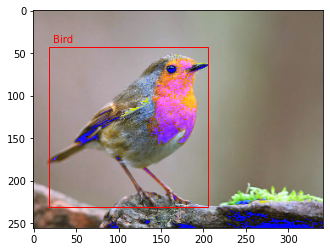

In [ ]:
visualize.show_labeled_image(image, boxes[0], labels[0])

In [ ]:
model.save('/content/drive/MyDrive/Super AI Engineer/Img_obj_dectection/Bird/model_weights.pth')